In [1]:
import numpy as np
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, load_model
from keras.layers import Dense, Embedding, LSTM, Bidirectional,Flatten,Dropout
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
import os
import collections
import re
import string

Using TensorFlow backend.


In [2]:
data = pd.read_csv('C:/Users/User.LAPTOP-LJ8HT7OG/Pictures/sidang/proposal/seminar_proposal1/proposal3.csv',index_col=0)

data.head()

,text,sentiment
1,kalo aernya segitumah kolem emangnye gue lele yeh,2
2,aka menteri,2
3,sekda idiot,1
4,air beda banjir,2
5,kemana banjir parah program jalankan prokasih...,1


In [3]:
data = data[['text','sentiment']]
data['text'].replace('',np.nan,inplace=True)

data.dropna(subset=['text'],inplace=True)

#data.sentiment.loc[(data['sentiment']==1)] = 0
#data.sentiment.loc[(data['sentiment']==2)] = 1
data.sentiment.loc[(data['sentiment']==1)] = 'Negatif'
data.sentiment.loc[(data['sentiment']==2)] = 'Positif'
data.head()

D:\semester 6\anaconda\envs\tf\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,text,sentiment
1,kalo aernya segitumah kolem emangnye gue lele yeh,Positif
2,aka menteri,Positif
3,sekda idiot,Negatif
4,air beda banjir,Positif
5,kemana banjir parah program jalankan prokasih...,Negatif


In [33]:
import pandas as pd
data = pd.read_csv('C:/Users/User.LAPTOP-LJ8HT7OG/Pictures/sidang/proposal/seminar_proposal1/sampelwawan.csv',index_col=0)

data.head()


,text,sentiment
1092,sekolah dimana sih,1
986,bapa ikan,1
994,makanan kali ah nikmati,2
686,hubungan nya banjir tubuh,2
53,ta e,1


In [34]:
data.sentiment.value_counts()

1    303
2    156
Name: sentiment, dtype: int64

In [35]:
import numpy as np
data = data[['text','sentiment']]
data['text'].replace('',np.nan,inplace=True)

data.dropna(subset=['text'],inplace=True)

data.sentiment.loc[(data['sentiment']==1)] = 0
data.sentiment.loc[(data['sentiment']==2)] = 1
data.head()

,text,sentiment
1092,sekolah dimana sih,0
986,bapa ikan,0
994,makanan kali ah nikmati,1
686,hubungan nya banjir tubuh,1
53,ta e,0


In [36]:
data.sentiment.value_counts()

0    303
1    154
Name: sentiment, dtype: int64

In [37]:
data[40:45]

,text,sentiment
1490,tenggelamkan,1
1026,manajemen air maksdnyafucku,0
1015,,0
377,tag warga kelapa gading disuruh menikmati cid ci,0
473,pajak bayar orang orang ya,0


In [42]:
data[178:183]

,text,sentiment
268,,1
1513,halu bk,1
1422,bodoh berjamaah,0
1517,tod,0
1005,spontan uhuuuyy,1


In [53]:
predicted1 = [1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,0,1,1,0,1,0,
         1,1,0,0,0,1,1,0,0,1,1,1,0,1,1,1,1,1,1,0,1,0,0,1,1,1,1,0,1,1,1,1,1,0,1,0,1,
         1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,0,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,
         0,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,
         1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,
         1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,
         1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,
         1,1,0,1,1,1,0,1,0,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,
         0,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,
         1,1,1,1,1,0,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,1,1,1,1,1,
         1,1,1,1,0,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,
         0,1,1,1,1,1,0,1,1,1,1,1,0,1,0,1,0,1,0,1,1,1,0,1,1,1,0,1,1,1,0,1,1,0,1,1,
         1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,0,1] 
predicted1.count(0)

75

In [41]:
#data.sentiment.values.tolist()

In [49]:
# Python script for confusion matrix creation. 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
  
predicted = [1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,0,1,1,0,1,0,
         1,1,0,0,0,1,1,0,0,1,1,1,0,1,1,1,1,1,1,0,1,0,0,1,1,1,1,0,1,1,1,1,1,0,1,0,1,
         1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,0,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,
         0,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,
         1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,
         1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,
         1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,
         1,1,0,1,1,1,0,1,0,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,
         0,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,
         1,1,1,1,1,0,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,1,1,1,1,1,
         1,1,1,1,0,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,
         0,1,1,1,1,1,0,1,1,1,1,1,0,1,0,1,0,1,0,1,1,1,0,1,1,1,0,1,1,1,0,1,1,0,1,1,
         1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,0,1] 
actual = [0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,0]
results = confusion_matrix(actual, predicted) 
  
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(actual, predicted)) 
print('Report : ')
print(classification_report(actual, predicted)) 

Confusion Matrix :
[[ 65 238]
 [ 10 144]]
Accuracy Score : 0.4573304157549234
Report : 
              precision    recall  f1-score   support

           0       0.87      0.21      0.34       303
           1       0.38      0.94      0.54       154

   micro avg       0.46      0.46      0.46       457
   macro avg       0.62      0.57      0.44       457
weighted avg       0.70      0.46      0.41       457



In [50]:
# Python script for confusion matrix creation. 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
  
actual = [1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,0,1,1,0,1,0,
         1,1,0,0,0,1,1,0,0,1,1,1,0,1,1,1,1,1,1,0,1,0,0,1,1,1,1,0,1,1,1,1,1,0,1,0,1,
         1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,0,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,
         0,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,
         1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,
         1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,
         1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,
         1,1,0,1,1,1,0,1,0,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,
         0,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,
         1,1,1,1,1,0,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,1,1,1,1,1,
         1,1,1,1,0,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,
         0,1,1,1,1,1,0,1,1,1,1,1,0,1,0,1,0,1,0,1,1,1,0,1,1,1,0,1,1,1,0,1,1,0,1,1,
         1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,0,1] 
predicted = [0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,0]
results = confusion_matrix(actual, predicted) 
  
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(actual, predicted)) 
print('Report : ')
print(classification_report(actual, predicted)) 

Confusion Matrix :
[[ 65  10]
 [238 144]]
Accuracy Score : 0.4573304157549234
Report : 
              precision    recall  f1-score   support

           0       0.21      0.87      0.34        75
           1       0.94      0.38      0.54       382

   micro avg       0.46      0.46      0.46       457
   macro avg       0.57      0.62      0.44       457
weighted avg       0.82      0.46      0.51       457



Negatif    999
Positif    526
Name: sentiment, dtype: int64

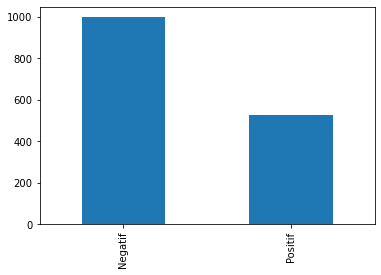

In [4]:
data['sentiment'].value_counts().plot(kind='bar')
data['sentiment'].value_counts()

In [5]:
tokenizer = Tokenizer(num_words=5000,filters='!”#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True,split=" ")
tokenizer.fit_on_texts(data['text'])
X = tokenizer.texts_to_sequences(data['text'])
X = pad_sequences(X,maxlen=500)
Y = data['sentiment']
vocab_size = len(tokenizer.word_index) + 1
# We can then create our train and test sets:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 24)
#We store this tokenizer in a file to use later in web app
import pickle
# saving
#with open('tokenizer22.pickle', 'wb') as handle:
 #   pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
from sklearn.preprocessing import LabelEncoder
def prepare_targets(y_train, y_test):
 le = LabelEncoder()
 le.fit(y_train)
 y_train_enc = le.transform(y_train)
 y_test_enc = le.transform(y_test)
 return y_train_enc, y_test_enc
ytrain,ytest = prepare_targets(Y_train,Y_test)

In [6]:
model = Sequential()
model.add(Embedding(vocab_size, 50, input_length=500))
#model.add(LSTM(128,return_sequences=True))
#model.add(LSTM(128,return_sequences=True))
model.add(LSTM(128))
model.add(Dropout(1))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam', 
loss='binary_crossentropy',
metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 50)           171200    
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               91648     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 262,977
Trainable params: 262,977
Non-trainable params: 0
_________________________________________________________________


In [7]:
from keras.callbacks import EarlyStopping
#es = EarlyStopping(monitor='val_acc', mode='acc', verbose=1, patience=5)
history=model.fit(X_train, ytrain,
 batch_size=100,
 epochs=10,
 validation_data=[X_test, ytest])
# callbacks=[es])
#We save this model so that we can use in own web app
#model.save('movie_sent.h5')

D:\semester 6\anaconda\envs\tf\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1067 samples, validate on 458 samples
Epoch 1/10
1067/1067 [==============================] - 19s 17ms/step - loss: 0.6757 - accuracy: 0.6345 - val_loss: 0.6510 - val_accuracy: 0.6594
Epoch 2/10
1067/1067 [==============================] - 19s 17ms/step - loss: 0.6435 - accuracy: 0.6532 - val_loss: 0.6303 - val_accuracy: 0.6594
Epoch 3/10
1067/1067 [==============================] - 21s 19ms/step - loss: 0.6251 - accuracy: 0.6532 - val_loss: 0.6098 - val_accuracy: 0.6594
Epoch 4/10
1067/1067 [==============================] - 20s 19ms/step - loss: 0.5570 - accuracy: 0.6682 - val_loss: 0.5624 - val_accuracy: 0.7031
Epoch 5/10
1067/1067 [==============================] - 21s 19ms/step - loss: 0.4953 - accuracy: 0.7676 - val_loss: 0.5550 - val_accuracy: 0.7052
Epoch 6/10
1067/1067 [==============================] - 22s 20ms/step - loss: 0.4255 - accuracy: 0.8257 - val_loss: 0.5405 - val_accuracy: 0.7140
Epoch 7/10
1067/1067 [==============================] - 21s 20ms/step - loss:

In [8]:
from matplotlib import pyplot
from numpy import array
model.history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [9]:
model.history.history['val_accuracy']

[0.6593886613845825,
 0.6593886613845825,
 0.6593886613845825,
 0.7030567526817322,
 0.7052401900291443,
 0.7139738202095032,
 0.7227074503898621,
 0.7227074503898621,
 0.7052401900291443,
 0.6877729296684265]

In [10]:
model.history.history['accuracy']

[0.63448924,
 0.65323335,
 0.65323335,
 0.6682287,
 0.76757264,
 0.8256795,
 0.8809747,
 0.9100281,
 0.9343955,
 0.9671978]

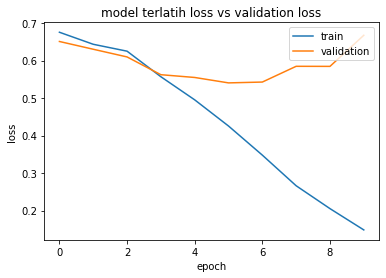

In [11]:
pyplot.plot(model.history.history['loss'])
pyplot.plot(model.history.history['val_loss'])
pyplot.title('model terlatih loss vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train','validation'],loc='upper right')
pyplot.show()

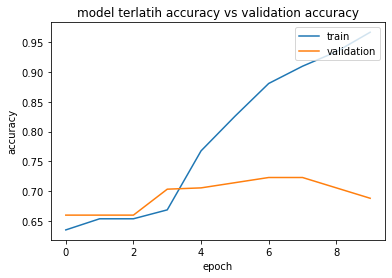

In [12]:
pyplot.plot(model.history.history['accuracy'])
pyplot.plot(model.history.history['val_accuracy'])
pyplot.title('model terlatih accuracy vs validation accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train','validation'],loc='upper right')
pyplot.show()

In [12]:
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest, y_pred.round())

array([[257,  45],
       [ 78,  78]], dtype=int64)

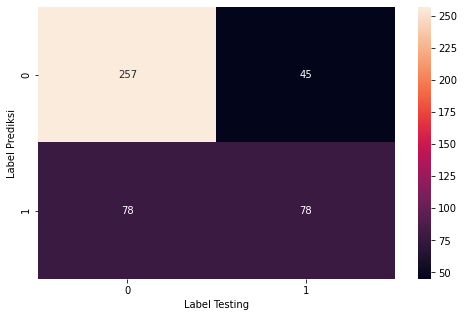

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(ytest, y_pred.round()), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Label Testing")
plt.ylabel("Label Prediksi")
plt.show()